## Homework 1: Part I: Regression Modeling with the Prostate Cancer Data ## 

Load libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
df = pd.read_csv("prostate.csv")

Dimensions

In [6]:
df.shape

(97, 11)

Column Names

In [7]:
df.columns.tolist()

['id',
 'lcavol',
 'lweight',
 'age',
 'lbph',
 'svi',
 'lcp',
 'gleason',
 'pgg45',
 'lpsa',
 'train']

Data Types

In [8]:
df.dtypes

id           int64
lcavol     float64
lweight    float64
age          int64
lbph       float64
svi          int64
lcp        float64
gleason      int64
pgg45        int64
lpsa       float64
train       object
dtype: object

First few rows

In [9]:
df.head()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Check missing values

In [10]:
df.isna().sum()

id         0
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

Exploratory Data Analysis (EDA)

Summary Statistics

In [11]:
df.describe()

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


Data Distributions

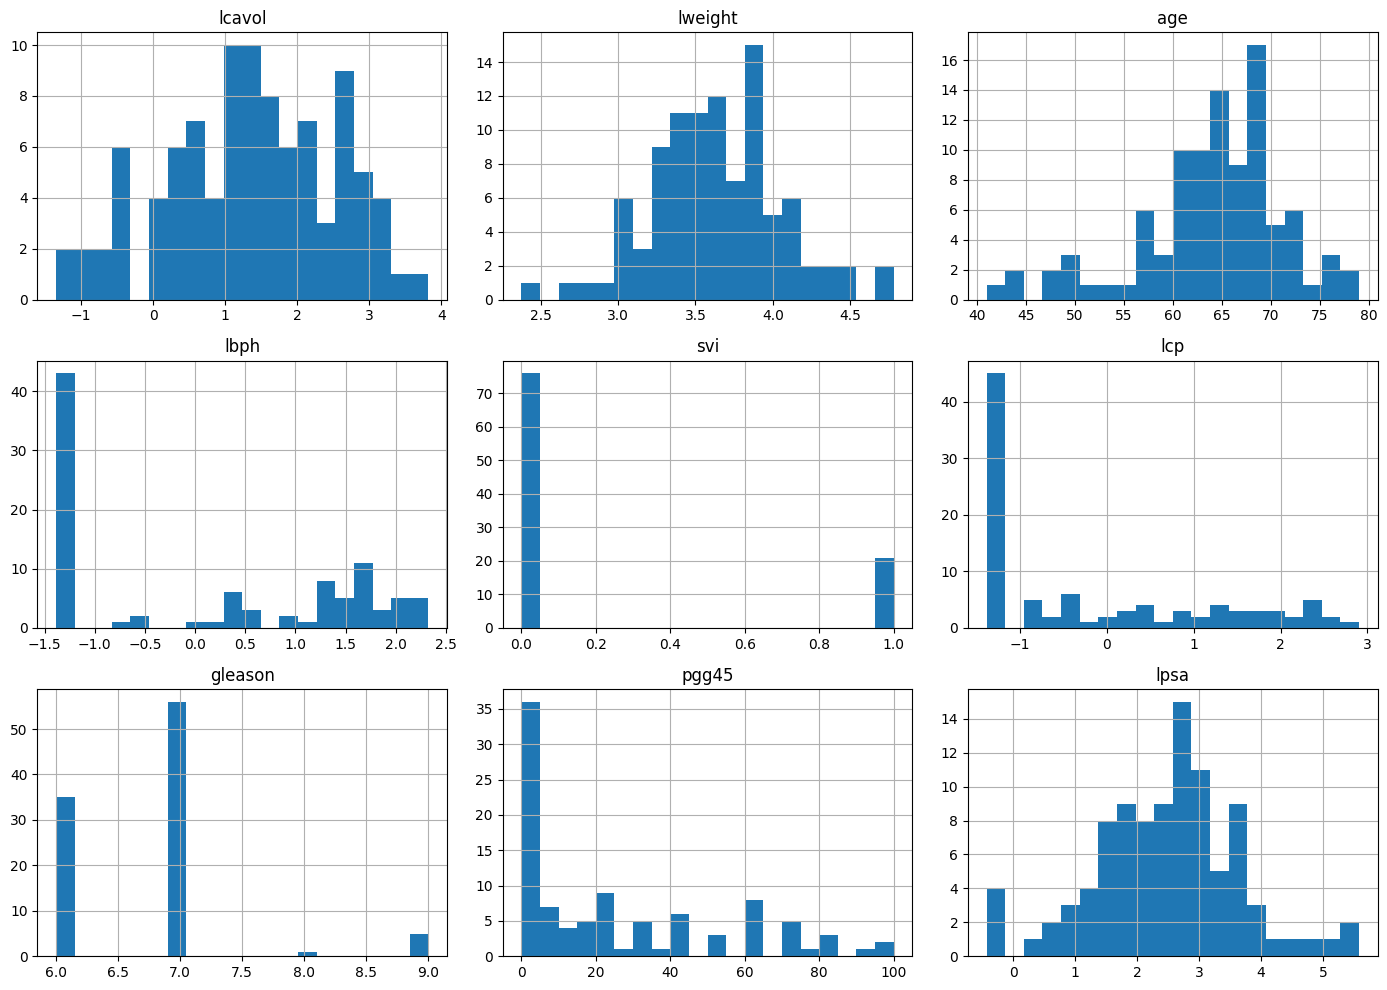

In [23]:
# Drop id and train columns
numeric_cols = df.drop(columns=["id","train"]).columns

# Visualize the remaining features in a histogram
df[numeric_cols].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

Pairplot Matrix

- Diagonal: distribution of each variable (orange = test, blue = train)

- Off-diagonal: pairwise relationships

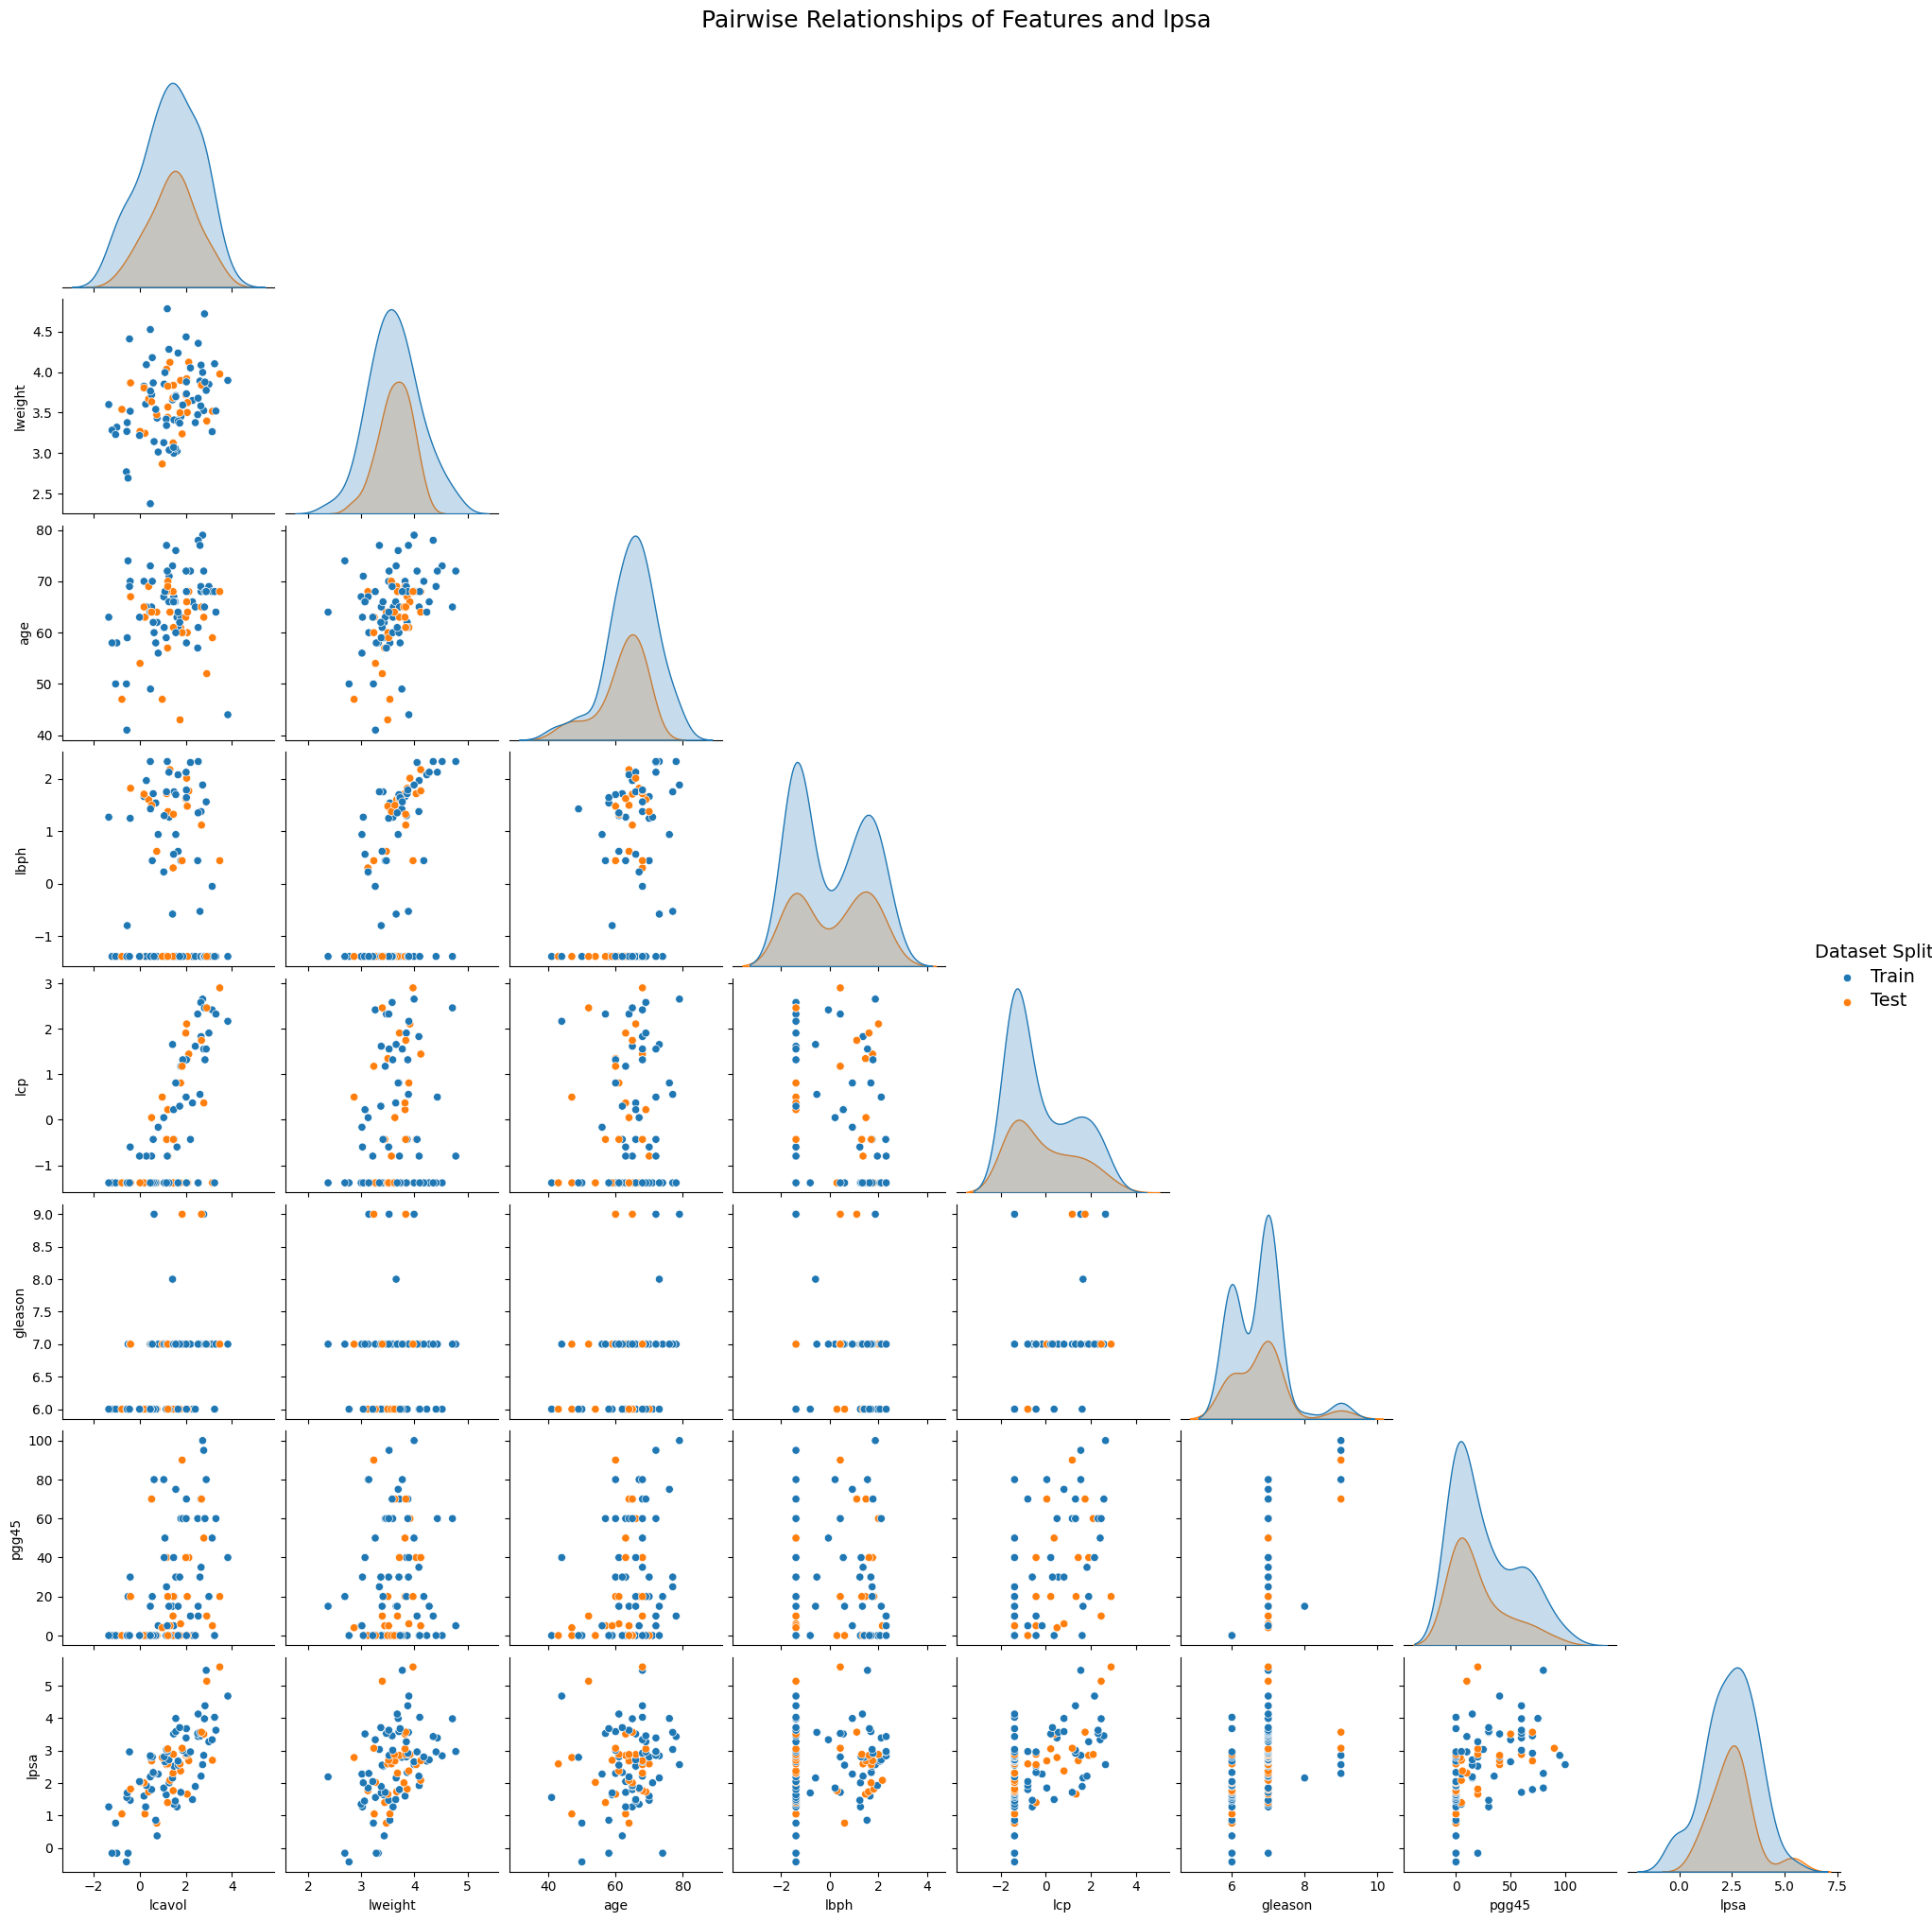

In [32]:
g = sns.pairplot(
    df,
    vars=["lcavol", "lweight", "age", "lbph", "lcp", "gleason", "pgg45", "lpsa"],
    hue="train",
    corner=True
)

g.fig.suptitle(
    "Pairwise Relationships of Features and lpsa",
    fontsize=18,
    y=1.02
)

# Rename legend labels
new_labels = ["Train", "Test"]
for text, label in zip(g._legend.texts, new_labels):
    text.set_text(label)

# Legend title & sizing
g._legend.set_title("Dataset Split")
g._legend.get_title().set_fontsize(14)
for text in g._legend.texts:
    text.set_fontsize(14)
g._legend.set_bbox_to_anchor((1.0, 0.5))


In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
train_df = df[df["train"] == True].copy()
test_df  = df[df["train"] == False].copy()

ntrain = train_df.shape[0]
ntest = test_df.shape[0]

ntrain, ntest

In [ ]:
X_train = train_df.drop(columns=["lpsa", "train"])
y_train = train_df["lpsa"]

X_test = test_df.drop(columns=["lpsa", "train"])
y_test = test_df["lpsa"]